# Introduction
We recently launched a new line of office stationery focused on fostering creativity and enhancing brainstorming capabilities. To optimize the sales approach for this new product line, we tested three different sales strategies: email, call, and a combination of email and call. The purpose of this analysis is to evaluate the effectiveness of these sales methods and provide insights to inform the sales strategy moving forward.

This report will detail the data validation and cleaning process, present the results of the explaratory data analysis, define a metric for the business to monitor, and provide recommendations based on the findings. By leveraging data-driven insights, we can hopefully make more informed decisions to improve sales performance and ensure the sucess of the new product line.

In [2]:
# library Other neccessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Data Importing and Validation

The original dataset has 15000 rows and 8 columns.
- The **week** column contains integer values from 1-6 corresponding to each week and 0 null values. No changes to this column were necessary.
- The **sales_method** column contains 5 different unique values **(Email, Call, Email + Call, em + call, email)** and 0 null values. The column should only contain 3 unique values corresponding to each type of sales method. Upon inspection of the values in this column simple mistakes such as different capitalization and use of abbrevations created two extra sets of values. Changes were made and after cleaning the column only contains the following 3 different value types corresponding to each alternate sales method: Email, Call, Email + Call
- The **customer_id** column contains unique identifiers for each customer and had no missing values. No changes to this column were required.
- The **revenue** column had 1074 missing values. I decided that the best approach to handle these missing values would be to replace them by the mean revenue corresponding to each type of sales_method.
- The **years_as_customer** column has 0 missing values, however we had 2 rows with invalid values. Since our company was founded in 1984, the maximum amount of years we could have any given customer is 39. Two rows had values with 47 and 63, which we know is not possible. I assume this was just a mistake in data entry, and I will replace these two values with 39.
- The **nb_site_visits** column has 0 missing values and all data is valid. No changes needed to be made to this column
- The **state** The column has 0 missing values and 50 unique values corresponding to each state. No changes need to be made to this column

Finally after all the data validation and cleaning I checked for any duplicate rows and found none. After cleaning and validating the data our dataset contains 15000 rows and 8 columns with 0 missing values.

In [5]:
# import data
df = pd.read_csv('product_sales.csv')

In [6]:
# print the first 10 rows of the data
print (df.head(10))

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   
5     6          Call  6489e678-40f2-4fed-a48e-d0dff9c09205       13    65.01   
6     4         Email  eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94       11   113.38   
7     1         Email  047df079-071b-4380-9012-2bfe9bce45d5       10    99.94   
8     5         Email  771586bd-7b64-40be-87df-afe884d2af9e       11   108.34   
9     5          Call  56491dae-bbe7-49f0-a651-b823a01103d8       11    53.82   

   years_as_customer  nb_site_visits          state  
0                  0              24        Arizona  


In [7]:
# Determine the number of rows and columns
num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 15000
Number of columns: 8


In [9]:
# Present some information from the database. Use the info() 
# and Describe()
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None
               week       nb_sold       revenue  years_as_customer  \
count  15000.000000  15000.000000  13926.000000       15000.000000   
mean       3.098267     10.084667     93.934943           4.965933   
std        1.656420      1.812213     47.435312           5.044952   
min        1.000000      7.000000     32.540000           0.000

In [14]:
# Check the various sales methods to ensure there are only 3 unique values. 
# Use the value_counts() and print the result
print(df['sales_method'].value_counts())

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


In [16]:
# Define a mapping dictionary to correct the inconsistent values(em + call and email)
mapping = {'em + call': 'Email + Call', 'email': 'Email'}

# Apply the mapping to the 'sales_method' column
df['sales_method'] = df['sales_method'].replace(mapping)


# Check the value counts to ensure there are only 3 unique values

print(df['sales_method'].value_counts())

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


In [18]:
# find the Average revenue for each sales method. Print the Value
df.groupby('sales_method')['revenue'].mean()

# Print the result
# print(avg_revenue_by_sales_method)

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64

In [20]:
# The company was founded in 1984, the maximum amount of years we could have any given customer is 41.
# Are there any customers who have a year recorded thats greater than 41? 
# max_years_as_customer = df['years_as_customer'].max()
df[df['years_as_customer'] > 41]
# df.loc[df['years_as_customer'] > 41, 'years_as_customer'] = 41

# Check if the maximum value is greater than 41
# if max_years_as_customer > 41:
#     print("There are customers with years as customer greater than 41.")
# else:
#     print("There are no customers with years as customer greater than 41.")

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [22]:
# Replace those customers years with 41
# df['years_as_customer'] = df['years_as_customer'].apply(lambda x: 41 if x > 41 else x)
df.loc[df['years_as_customer'] > 41, 'years_as_customer'] = 41


In [24]:
# check to see if replacement worked
# max_years_as_customer = df['years_as_customer'].max()
# print(max_years_as_customer)
df[df['years_as_customer'] > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [26]:
# check number of unique values for state
df['state'].nunique()

50

In [28]:
# check if any duplicate rows in the sales_data
df[df.duplicated()]
#num_duplicate_rows = df.duplicated().sum()
#if num_duplicate_rows > 0:
 #   print(f"There are {num_duplicate_rows} duplicate rows in the data.")
#else:
 #   print("There are no duplicate rows in the data.")

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


# 3. Exploratory Analysis

### A. Number of Customers for each Sales Method
Our most popular sales method during the 6 week period was via Email with a total of 7466 customers, followed by the Call method with 4962 customers and finally the Email + Call method with 2572 total customers.

In [32]:
# find number of customers for each sales method
customers_by_sales_method = df.groupby('sales_method')['customer_id'].nunique()
print("Number of customers by sales method:\n")
print(customers_by_sales_method)

Number of customers by sales method:

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64


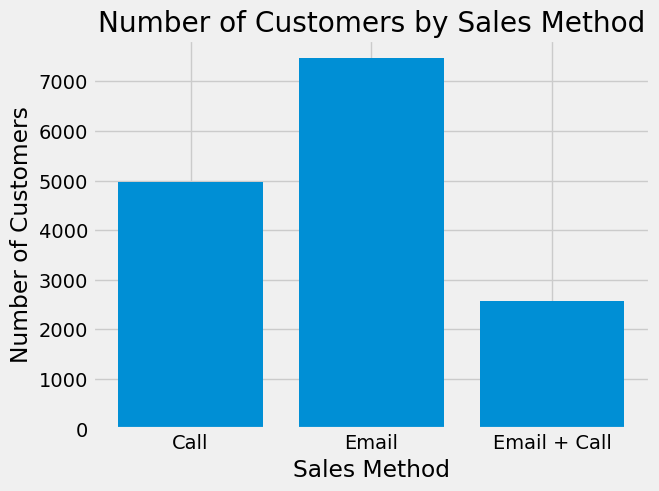

In [34]:
# plot your findings using a barplot
# Plot the bar chart
plt.bar(customers_by_sales_method.index, customers_by_sales_method.values)

# Set the title
plt.title('Number of Customers by Sales Method')

# Add value labels to each bar

# Set the x and y axis labels
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.show()

### B. Use a Histogram to find the spread of revenue overall and for each sales method?


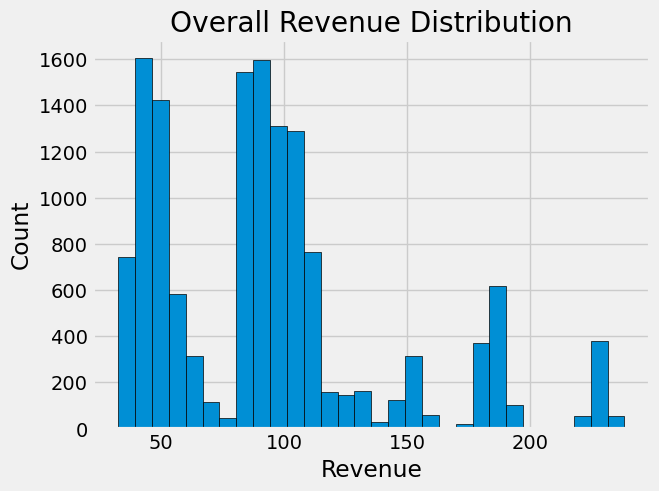

In [38]:
# Histogram for overall revenue. use the title for the plot 'Overall Revenue Distribution'
plt.hist(df['revenue'].dropna(), bins=30, edgecolor="black")
plt.xlabel('Revenue')

# Set the y-axis label to 'Count'
plt.ylabel('Count')

# Set the title of the plot to 'Overall Revenue Distribution'
plt.title('Overall Revenue Distribution')
plt.show()

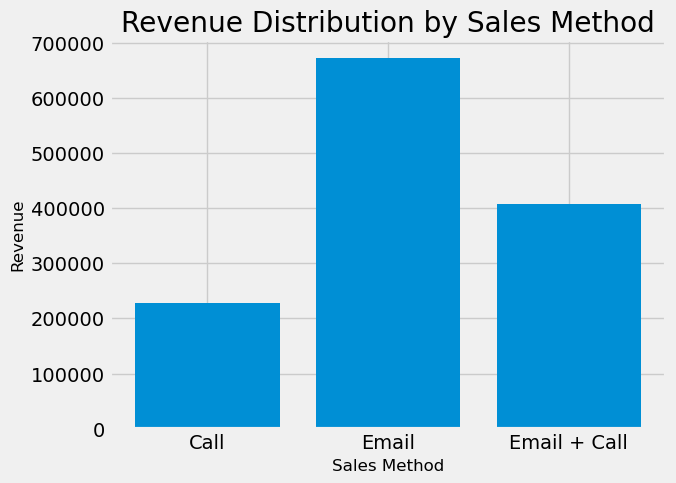

In [40]:
# Plot revenue(x axis) vs sales method(y-axis) with title Revenue Distribution by Sales Method  
grouped_data = df.groupby('sales_method')['revenue'].sum()

# Plotting
plt.bar(grouped_data.index, grouped_data.values)
plt.title('Revenue Distribution by Sales Method')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Sales Method', fontsize=12)
plt.show()

### C. determine and plot Revenue over Time For Each Sales Method(use the .sum().unstack()

week  sales_method
1     Call             26159.18
      Email           229765.55
      Email + Call     16885.33
2     Call             33792.02
      Email           137891.57
      Email + Call     26376.23
3     Call             36247.27
      Email            98792.14
      Email + Call     48737.14
4     Call             49593.99
      Email           107788.37
      Email + Call     78296.20
5     Call             53518.11
      Email            74373.45
      Email + Call    126809.72
6     Call             28252.92
      Email            23706.75
      Email + Call    111152.07
Name: revenue, dtype: float64
week                  1          2         3          4          5          6
sales_method                                                                 
Call           26159.18   33792.02  36247.27   49593.99   53518.11   28252.92
Email         229765.55  137891.57  98792.14  107788.37   74373.45   23706.75
Email + Call   16885.33   26376.23  48737.14   78296.20  126809

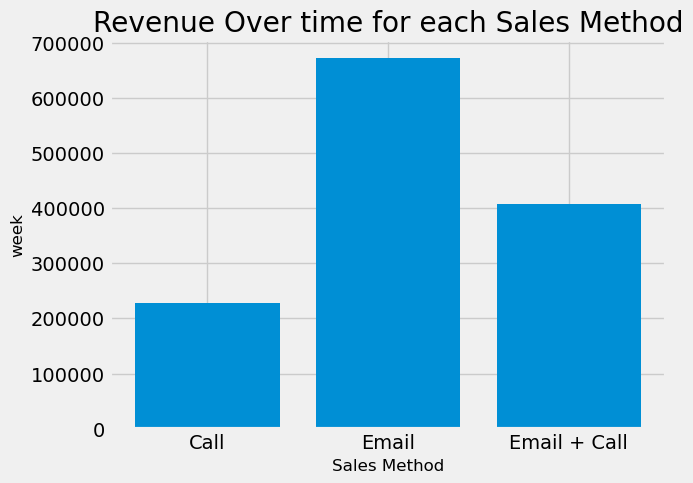

In [52]:
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum()
print(revenue_over_time)
revenue_over_time_chart = revenue_over_time.unstack("week")
print(revenue_over_time_chart)
plt.bar(grouped_data.index, grouped_data.values)
plt.title('Revenue Over time for each Sales Method')
plt.ylabel('week', fontsize=12)
plt.xlabel('Sales Method', fontsize=12)
plt.show()

plt.show()

Results from Analysis! From the table above we see following:
- In week 1, the 'Email' sales method generated the highest revenue ($48,122.68), followed by 'Email + Call' (20,007.40) and 'Call' (27,015.93). However, it is important to note that the 'Email' method required the least effort from the sales team, making it the most efficient method during the first week.
- Over the course of the 6 weeks sales generated from the Email sales method consistently decreased. This decline in revenue overtime could indicate diminishing returns from the Email sales method as time goes on.
- The call method shows an overall incresing trend in revenue overtime with some fluctations. Towards the end of the 6 week period the amount of revenue generated from the Call method began to decrease.
- The Email + Call method shows a healthy increasing trend of revenue over the 6 week period. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods.

In conclusion, the Email + Call sales method appears to be the most promising in terms of long-term revenue generation, although it does require more effort from the sales team. The Email method starts strong but shows a steady decline, while the Call method has an overall increasing trend but fluctuates more. It is recommended to consider the efficiency and effort required for each method while making a decision on which sales method to continue using.

In [20]:
#Print the summary revenue generated over time.
# Calculate the summary revenue generated over time
summary_revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Rename the `revenue` column to `sum_revenue`
summary_revenue_over_time = summary_revenue_over_time.rename(columns={'revenue': 'sum_revenue'})

# Print the results
print("Summary revenue generated over time:\n")
print(summary_revenue_over_time)

Summary revenue generated over time:

    week  sales_method  sum_revenue
0      1          Call     26159.18
1      1         Email    229765.55
2      1  Email + Call     16885.33
3      2          Call     33792.02
4      2         Email    137891.57
5      2  Email + Call     26376.23
6      3          Call     36247.27
7      3         Email     98792.14
8      3  Email + Call     48737.14
9      4          Call     49593.99
10     4         Email    107788.37
11     4  Email + Call     78296.20
12     5          Call     53518.11
13     5         Email     74373.45
14     5  Email + Call    126809.72
15     6          Call     28252.92
16     6         Email     23706.75
17     6  Email + Call    111152.07


### D. Investigating other differences between customers in each group
Looking at the charts below we can make some interesting observations:
- The number of years we've done business with customers across each sales method was more or less equal.
- The email + call sales method saw an average of 12 sales per customer compared to 10 for call and email methods. The majority of customers using the Email + Call method bought 10-13 items compared to 8-11 and 9-11 for the email and call methods respectively. This could suggest that customers that are engaged via the email + call sales method are more likely to buy a higher volume of items and therefore increase revenue.
- We can also see that customer's that were contacted via the email + call sales method had more site visits on average than the email and call methods individually. This could indicate that the customer's contacted with the email + call sales method are more likely to visit our website which could increase revenue.

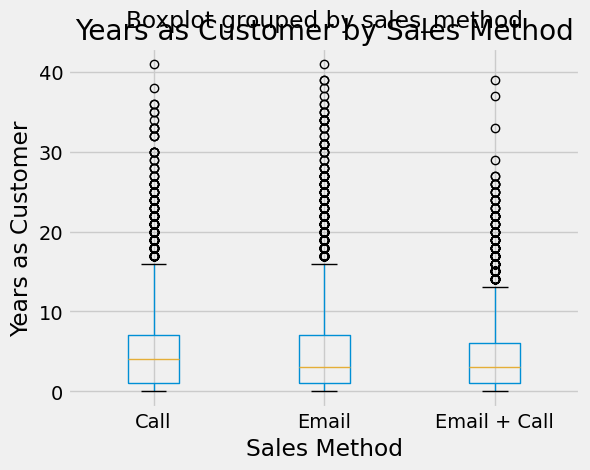

In [21]:
# Plot using a Boxplot to visualize the number of years customers have been buying from the company 
# Use (column='years_as_customer', by='sales_method')

df.boxplot(column='years_as_customer', by='sales_method')

# Adding titles and labels
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.show()




# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

C:\Users\D4rk\AppData\Local\Temp\ipykernel_20116\1565053286.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, patch_artist=True, labels=states)


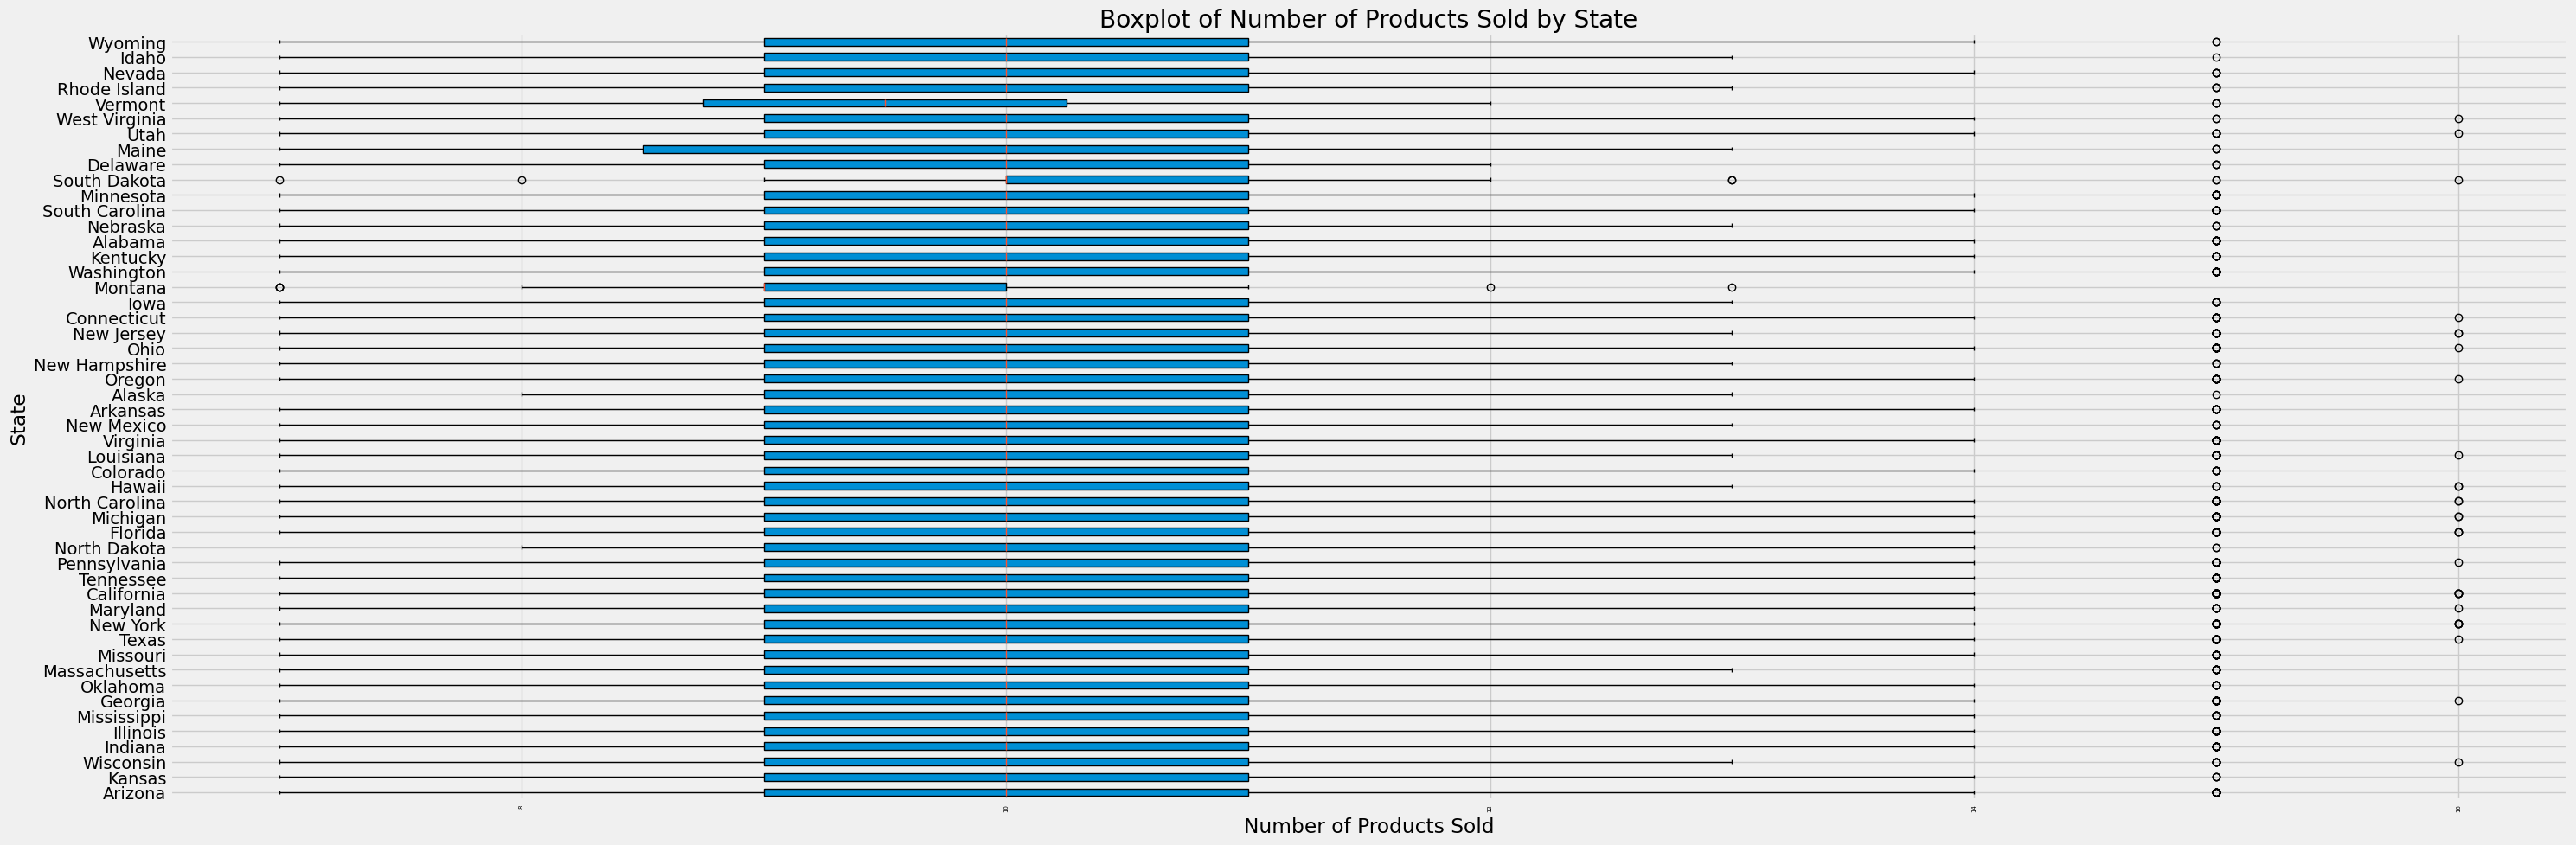

In [29]:
# Plot using a Boxplot to visualize the number of new products sold in various states. 
# Use (column='nb_sold', by='state')

# Increase the plot size to 30 by 10
plt.figure(figsize=(30, 10))

# Create a boxplot using `nb_sold` on the x-axis and `state` on the y-axis
states = df['state'].unique()
data = [df['nb_sold'][df['state'] == state] for state in states]
plt.boxplot(data, vert=False, patch_artist=True, labels=states)
plt.xlabel('Number of Products Sold')
plt.ylabel('State')
plt.title('Boxplot of Number of Products Sold by State')

# Rotate x-axis labels by 90 degrees and decrease font size to 5
plt.xticks(rotation=90, fontsize=5)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

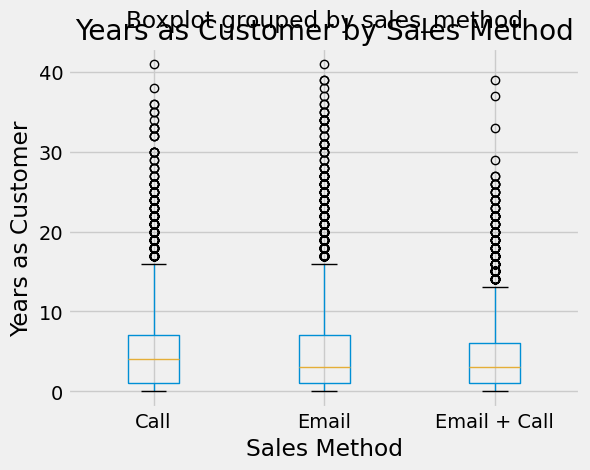

In [37]:
# Boxplot for years_as_customer by sales_method
df.boxplot(column='years_as_customer', by='sales_method')

# Adding titles and labels
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.show()

C:\Users\D4rk\AppData\Local\Temp\ipykernel_20116\2356664723.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=True, patch_artist=True, labels=sales_methods)


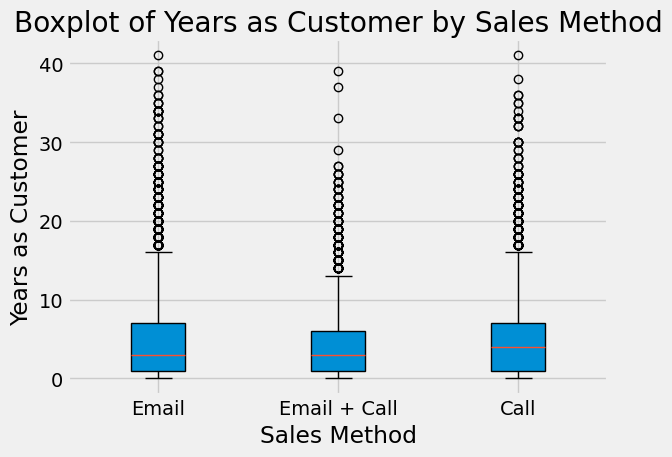

In [38]:
# Boxplot for years_as_customer by sales_method
import matplotlib.pyplot as plt

# Create a boxplot using `years_as_customer` on the y-axis and `sales_method` on the x-axis
sales_methods = df['sales_method'].unique()
data = [df['years_as_customer'][df['sales_method'] == sales_method] for sales_method in sales_methods]
plt.boxplot(data, vert=True, patch_artist=True, labels=sales_methods)
plt.ylabel('Years as Customer')
plt.xlabel('Sales Method')
plt.title('Boxplot of Years as Customer by Sales Method')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


| week   | sales_method   | average_revenue   |
|:-------|:---------------|:------------------|
| 1      | Call           | 35.3502           |
| 1      | Email          | 87.4964           |
| 1      | Email + Call   | 128.896           |
| 2      | Call           | 43.6026           |
| 2      | Email          | 100.139           |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   week             18 non-null     int64  
 1   sales_method     18 non-null     object 
 2   average_revenue  18 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 564.0+ bytes
None


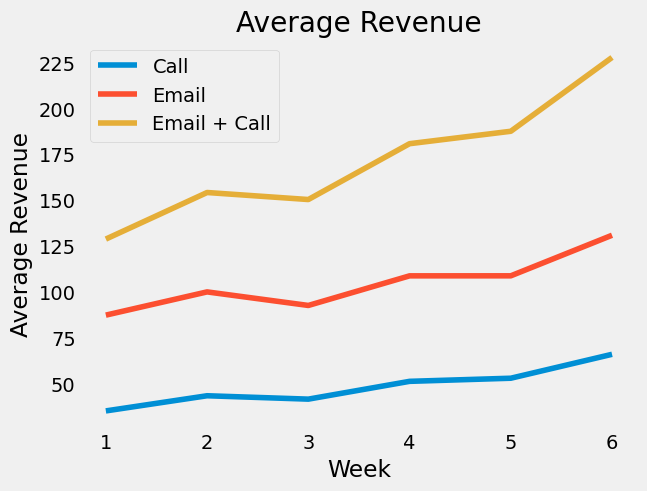

In [39]:
# Determine the Average Revenue per Customer by Sales Method over Time


# Aggregate the data by `week` and `sales_method`
average_revenue_by_sales_method_over_time = df.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

# Rename the aggregated column to `average_revenue`
average_revenue_by_sales_method_over_time = average_revenue_by_sales_method_over_time.rename(columns={'revenue': 'average_revenue'})

# Print the first 5 rows of the dataframe
print(average_revenue_by_sales_method_over_time.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column name and their data types
print(average_revenue_by_sales_method_over_time.info())
# Create a line plot using `week` on the x-axis and `average_revenue` on the y-axis
for sales_method in average_revenue_by_sales_method_over_time['sales_method'].unique():
    df_subset = average_revenue_by_sales_method_over_time[average_revenue_by_sales_method_over_time['sales_method'] == sales_method]
    plt.plot(df_subset['week'], df_subset['average_revenue'], label=sales_method)

plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.title('Average Revenue')
plt.legend()
plt.grid()
plt.show()

## 4. Defining Business Metrics to Track Performance - Average Revenue per Customer Sales Effort
To get a better understanding of the performance of each sales method let's create a metric called Average Reveue per Customer Sales Effort(ARPSE). This metric takes into account the difficulty of each sales method in terms of time spent with email having a value of 0.5, email + call 1 and call 3.

**ARCPM = (Total Revenue for Method) / (Number of customers * Sales effort)**

In [40]:
# Define the sales effort for each sales method
sales_effort_values = {
    'Email': 0.5,
    'Email + Call': 1,
    'Call': 3
}

# Map the sales effort values to the sales methods
df['sales_effort'] = df['sales_method'].map(sales_effort_values)

# Print the first 5 rows of the dataframe
print(df.head())

# Print the column name and their data types
print(df.info())

# Group the data by sales_method and aggregate the total revenue and number of customers
grouped_data = df.groupby('sales_method').agg(
    total_revenue=('revenue', 'sum'),
    num_customers=('customer_id', 'count')
).reset_index()

# Calculate ARCPM for each sales method
grouped_data['ARCPM'] = grouped_data['total_revenue'] / grouped_data['num_customers']

# Display the ARCPM for each sales method
arcpm_table = grouped_data[['sales_method', 'ARCPM']]
print(arcpm_table)



   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  sales_effort  
0                  0              24    Arizona           0.5  
1                  1              28     Kansas           1.0  
2                  6              26  Wisconsin           3.0  
3                  3              25    Indiana           0.5  
4                  0              28   Illinois           0.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          

Your Analysis results!!!!!!!!
The ARCPSE results show that Email has the highest value with 194.25, followed by Email + Call with 183.65 and finally call with 15.86. This suggests that the call method is the most efficient in terms of reveneue generated per unit of effort.

However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

## Conclusion and Recommendations
Taking in all factors from the analysis it is recommended to focus on the Email + Call method for the following reasons:

- While 'Email' has the highest ARCPSE, the 'Email + Call' method generates more customer engagement, as evidenced by higher website visits and average items purchased. This could lead to stronger customer relationships and long-term growth.
- The 'Email + Call' method has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success.
- The 'Call' method is the least efficient in terms of effort and revenue generation and has a downward trend in revenue over time.
In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.